<a href="https://colab.research.google.com/github/kosarHNajafi/R.Codes/blob/main/RTN_NCA_Finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[1.Curating data set](#scrollTo=Oyrqhny5FFXs)

>[2.Which Data to Use regarding Discovery Data set?](#scrollTo=otBerHwcSBjw)

>[3.Sample Annotation(Column Annotation)](#scrollTo=T4C7sq_9cKyQ)

>[4.Gene Annotation](#scrollTo=aiQreEAVnV4B)

>[5.Build First rtni-data](#scrollTo=_HmzcQkbeXY3)

>[6.Building Regulons](#scrollTo=xDCQnICdrkle)



# 1.rtni1st; Up to regulons for all genes


# 1.Discovery Data Set(First Code cell)

There are some  non_numeric_elements in Discovery data set;such as NA and "5.14893783197 5.", "11.3176307652 11" "5.455753203 5.36".

before working with all 19220 gene expressions in discovery data set(which one of them is "NA" thus deleted and remained 19219 genes in the row; non_numeric values should be handled.

In [ ]:
#R File from '~/NCA.ER/NCA.METABRIC/METABRIC.NCA.MP.TF.EPSNA.R'
#---Load libraries-----------------
library(biomaRt)
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load txt. Format for available genes in the discovery dataset
Disc.ALL <- read.delim("~/NCA.ER/data/Disc.Raw.Genes.all.txt",header = TRUE, as.is = TRUE)

sum(is.na(Disc.ALL[, 1]))  # Count the number of NA values
#[1] 1

which(is.na(Disc.ALL[, 1]))  # Identify their positions
#[1] 11028 in the main file not sorted, only metabolic clusters row was removed.
# [1] 10390 in the sorted data based on gene names without 1 and 0 metabolic clusters.

Disc.ALL <- Disc.ALL[-11028,]  # Remove the row with 'NA' as gene name
rownames(Disc.ALL) <- Disc.ALL[,1]
Disc.ALL <- Disc.ALL[,-1]
dim(Disc.ALL)
#[1] 19219  993

str(Disc.ALL)
#'data.frame':	19219 obs. of  993 variables:
#$ MB.0005: chr  "6.24393549" "5.228923847" "6.781157168" "5.583909882" ...
#$ MB.0006: num  6.22 5.91 6.75 5.36 6.08 ...
#$ MB.0008: num  6.06 5.3 7.66 5.3 5.69 ...
#$ MB.0014: num  6.16 5.4 6.68 5.85 5.65 ...

View(Disc.ALL)

colnames(Disc.ALL) <- gsub("\\.", "_", colnames(Disc.ALL))

#Sort data by columnnames(Sample IDs) and rownames(Gene IDs)
Disc.ALL <- Disc.ALL[order(rownames(Disc.ALL)),order(colnames(Disc.ALL))]
View(Disc.ALL)
head(Disc.ALL)
str(Disc.ALL)
#'data.frame':	19219 obs. of  993 variables:
#$ MB_0005: chr  "5.059348923" "9.924912584" "5.421198528" "6.24393549" ...
#$ MB_0006: num  5.37 11.31 5.14 6.22 5.91 ...
#$ MB_0008: num  5.28 9.83 5.56 6.06 5.3 ...
#$ MB_0014: num  5.53 10.68 5.36 6.16 5.4 ...
#$ MB_0020: num  5.28 9.31 5.69 6.16 5.53 ...

#check for NAs
sum(is.na(Disc.ALL))
#[1] 10

which(is.na((rownames(Disc.ALL))))
#integer(0)

#check for non-numeric elements
counts.Disc.all <- as.matrix(Disc.ALL)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements1 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements1)
#[1] 204

write.table(non_numeric_elements1,"~/NCA.ER/NCA.Disc/non_numeric_all.txt",sep = "\t",row.names = FALSE)

# Remove everything after the first space, including trailing digits and an optional dot
counts.Disc.all <- gsub("\\s+\\d+\\.?$", "", counts.Disc.all)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements2)
#[1] 13

print(non_numeric_elements2)
#[1] "11.60540448 7.88" "5.455753203 5.36" "5.3912438332 5.4" NA
#[5] NA                 NA                 NA                 NA
#[9] NA                 NA                 NA                 NA
#[13] NA

write.table(counts.Disc.all,"~/NCA.ER/data/pre.curated.Disc.all.Genes.txt",sep = "\t",row.names = TRUE)

#Three non_numeric values the end digits were removed manually
Disc.ALL2 <- read.delim("~/NCA.ER/Finalyzing/1.Curating.Data/2.pre.counts.Disc.all.Genes.txt",header = TRUE, as.is = TRUE, row.names = 1)
str(Disc.ALL2)
#'data.frame':	19219 obs. of  993 variables:
#$ MB_0005: num  5.06 9.92 5.42 6.24 5.23 ...
#$ MB_0006: num  5.37 11.31 5.14 6.22 5.91 ...
#$ MB_0008: num  5.28 9.83 5.56 6.06 5.3 ...
#$ MB_0014: num  5.53 10.68 5.36 6.16 5.4 ...
#$ MB_0020: num  5.28 9.31 5.69 6.16 5.53 ...

counts.Disc.all <- as.matrix(Disc.ALL2)
non_numeric_elements3 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements3)
#[1] 10

print(non_numeric_elements3)
#[1] NA NA NA NA NA NA NA NA NA NA

# Convert the matrix to numeric values (after applying gsub)
counts.Disc.all <- apply(counts.Disc.all, c(1, 2), as.numeric)

# Check the structure of the matrix after conversion
str(counts.Disc.all)
#num [1:19219, 1:993] 5.06 9.92 5.42 6.24 5.23 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:19219] "A1CF" "A2M" "A2ML1" "A4GALT" ...
#..$ : chr [1:993] "MB_0005" "MB_0006" "MB_0008" "MB_0014" ...

#Replace NA with the average of the row
counts.Disc.all <- t(apply(counts.Disc.all, 1, function(row) {
  # Replace NA in the row with the mean of non-NA values in that row
  row[is.na(row)] <- mean(row, na.rm = TRUE)
  return(row)
}))

View(counts.Disc.all)

write.table(counts.Disc.all,file = file.path("~/NCA.ER/Finalyzing/1.Curating.Data/","3.Disc.Genes.Curated.txt"),sep = "\t")

# 2.Validation(Second Code Cell)

In the validation data set there is no such problem

In [ ]:
#R File from '~/NCA.ER/Finalyzing/1.Curating.Data/Disc.Curating.R'
#---Load libraries-----------------
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load txt. Format for available genes in the Validovery dataset
Valid.ALL <- read.delim("~/NCA.ER/data/VALID.Genes.txt",header = TRUE, as.is = TRUE)

sum(is.na(Valid.ALL[, 1]))  # Count the number of NA values
#[1] 1

which(is.na(Valid.ALL[, 1]))  # Identify their positions
#[1] 11028 in the main file not sorted, only metabolic clusters row was removed.
# [1] 10390 in the sorted data based on gene names without 1 and 0 metabolic clusters.

Valid.ALL <- Valid.ALL[-10390,]  # Remove the row with 'NA' as gene name
rownames(Valid.ALL) <- Valid.ALL[,1]
Valid.ALL <- Valid.ALL[,-1]
dim(Valid.ALL)
#[1] 19219  994

str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB.0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB.0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB.0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB.0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB.0035: num  5.52 8.8 5.05 5.49 5.16 ...

View(Valid.ALL)

colnames(Valid.ALL) <- gsub("\\.", "_", colnames(Valid.ALL))

#Sort data by columnnames(Sample IDs) and rownames(Gene IDs)
Valid.ALL <- Valid.ALL[order(rownames(Valid.ALL)),order(colnames(Valid.ALL))]
View(Valid.ALL)
head(Valid.ALL)
str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB_0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB_0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB_0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB_0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB_0035: num  5.52 8.8 5.05 5.49 5.16 ...

#check for NAs
sum(is.na(Valid.ALL))
#[1] 4

which(is.na((rownames(Valid.ALL))))
#integer(0)

#check for non-numeric elements
counts.Valid.all <- as.matrix(Valid.ALL)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements1 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements1)
#[1] 4

print(non_numeric_elements1)
#[1] NA NA NA NA

# Check the structure of the matrix after conversion
str(counts.Valid.all)
#num [1:19219, 1:994] 5.25 9.84 5.34 6.65 5.66 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:19219] "A1CF" "A2M" "A2ML1" "A4GALT" ...
#..$ : chr [1:994] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

counts.Valid.all <- t(apply(counts.Valid.all, 1, function(row) {
  # Replace NA in the row with the mean of non-NA values in that row
  row[is.na(row)] <- mean(row, na.rm = TRUE)
  return(row)
}))

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements2)
#[1] 0

print(non_numeric_elements2)
#numeric(0)

View(counts.Valid.all)

write.table(counts.Valid.all,file = file.path("~/NCA.ER/Finalyzing/1.Curating Data/Valid.Curating Data/","Valid.Genes.Curated.txt"),sep = "\t")

#---Checking the expression of new combined metabolic genes with all genes---------

#Check the data before and after curating nin_numric values
Valid.mp.tf <- read.delim("~/NCA.ER/data/Valid.MP.TF.txt",header = TRUE, as.is = TRUE, row.names = 1)
colnames(Valid.mp.tf) <- gsub("\\.", "_", colnames(Valid.mp.tf))
Valid.mp.tf <- Valid.mp.tf[order(rownames(Valid.mp.tf)),order(colnames(Valid.mp.tf))]

counts.Valid.mp.tf <- as.matrix(Valid.mp.tf)

non_numeric_elements.mp.tf <- counts.Valid.mp.tf[is.na(as.numeric(counts.Valid.mp.tf))]
print(non_numeric_elements.mp.tf)
#numeric(0)

#Valid.genes.all-->curated-->Valid.mp.tf OR Valid.genes.all-->Valid.mp.tf-->curated
test <- intersect(rownames(counts.Valid.all),rownames(Valid.mp.tf))
test2 <- counts.Valid.all[test,]
all.equal(counts.Valid.mp.tf,test2) #[1] TRUE

save.image("~/NCA.ER/Finalyzing/1.Curating Data/Valid.Curating Data/Valid.all.Genes.Curated.RData")



# 1-2.Which Data to Use regarding Discovery Data set?
(*Not mentioned in the disc.all.genes project)


At the first step to compare the expression data, It beginned with loading the disc.mp.tf which stands for discovery data set metabolic genes and transcription factor genes I wanted to show non_numeric elements that have been curated to get the expression matrix that here is named as "test" data.

After curating the Discovery dataset from non_numeric elements;
I checked the difference between the time I took metabolic genes and transcription factor genes directly from discovery data set before curating which I have used through all my analysis here named as "test" VS. the time I took the same genes expression after curating discovery data set named as "test3". they have 3.667215e-08 mean difference indeed.

In [ ]:
#---Checking the expression of new combined metabolic genes with all genes---------

#Check the data before and after curating nin_numric values
disc.mp.tf <- read.delim("~/NCA.ER/data/DISC.MP.TF.Genes.txt",header = TRUE, as.is = TRUE, row.names = 1)
counts.disc.mp.tf <- as.matrix(disc.mp.tf)

non_numeric_elements.mp.tf <- counts.disc.mp.tf[is.na(as.numeric(counts.disc.mp.tf))]
print(non_numeric_elements.mp.tf)
#[1] "5.24408565936 5." "5.266270898297 5" "7.08498028378 6." "5.475669392427 5"
#[5] "5.529674338976 5" "6.530990146544 7" "6.245621615493 6" "5.748945951723 5"
#[9] "6.67129437167 7." "5.883760590443 5" "7.607295123545 8" "6.391411320326 6"
#[13] "5.261103082174 5" "6.419634552761 5"

#Disc.genes.all-->curated-->disc.mp.tf OR disc.genes.all-->disc.mp.tf-->curated
test <- read.delim("~/NCA.ER/data/DISC.MP.TF.Curated.txt",header = TRUE, as.is = TRUE, row.names = 1)
colnames(test) <- gsub("\\.", "_", colnames(test))
test <- test[order(rownames(test)),order(colnames(test))]
test <- as.matrix(test)
test2 <- intersect(rownames(counts.Disc.all),rownames(test))
test3 <- counts.Disc.all[test2,]
all.equal(test,test3) #[1] "Mean relative difference: 3.667215e-08"


save.image("~/NCA.ER/Finalyzing/1.Curating.Data/Disc.all.Genes.Curated.RData")


# 2.Sample Annotation(Column Annotation)
METABRIC Clinical file was retrieved from [cBioPortal](https://www.cbioportal.org/study/clinicalData?id=brca_metabric)


In [ ]:
Metabric_Manual_disc <- read.delim("~/NCA/data/METABRIC Clinical.txt", row.names = 1)
View(Metabric_Manual_disc)

Metabric_Manual_disc <- Metabric_Manual_disc[order(rownames(Metabric_Manual_disc)),]
View(Metabric_Manual_disc)

# Replace dots with underscores in column names if needed
rownames(Metabric_Manual_disc) <- gsub("\\-", "_", rownames(Metabric_Manual_disc))
View(Metabric_Manual_disc)

# Load required library
library(dplyr)

# Assuming your dataset is named Metabric_Manual_disc
# Create a new binary dataframe based on transformations
Metabric_Manual_disc <- Metabric_Manual_disc %>%
  transmute(
    IDs = rownames(Metabric_Manual_disc),
    Cohort = Cohort,

    OS.time = Overall.Survival..Months.,
    OS.event = ifelse(Overall.Survival.Status == "1:DECEASED", 1, 0),
    DSS.event = ifelse(Patient.s.Vital.Status == "Died of Disease", 1, 0),
    RFS.event = ifelse(Relapse.Free.Status == "1:Recurred", 1, 0),
    RFS.time = Relapse.Free.Status..Months.,

    Grade = Neoplasm.Histologic.Grade,
    Size = Tumor.Size,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,


    # Subtypes for LumA, LumB, Basal, Her2, Normal based on Pam50 subtype
    LumA = ifelse(Pam50...Claudin.low.subtype == "LumA", 1, 0),
    LumB = ifelse(Pam50...Claudin.low.subtype == "LumB", 1, 0),
    Basal = ifelse(Pam50...Claudin.low.subtype == "Basal", 1, 0),
    Her2 = ifelse(Pam50...Claudin.low.subtype == "Her2", 1, 0),
    Normal = ifelse(Pam50...Claudin.low.subtype == "Normal", 1, 0),

    # ER and PR status (positive and negative)
    `ER+` = ifelse(ER.Status == "Positive", 1, 0),
    `ER-` = ifelse(ER.Status == "Negative", 1, 0),


    # Histologic Grade categories G1, G2, G3
    G1 = ifelse(Neoplasm.Histologic.Grade == 1, 1, 0),
    G2 = ifelse(Neoplasm.Histologic.Grade == 2, 1, 0),
    G3 = ifelse(Neoplasm.Histologic.Grade == 3, 1, 0),

    # Hormone Therapy (HT)
    HT = ifelse(Hormone.Therapy == "YES", 1, 0),

  )
View(Metabric_Manual_disc)

# Print head of the colAnnotation for verification
head(Metabric_Manual_disc)

In [ ]:
#---Converting Metabric Clinical data into Sample Annotation---
Disc_sample_all_ids <- colnames(counts.Disc.genes)
View(Disc_sample_all_ids)
length(Disc_sample_all_ids)
#[1] 993
sort(Disc_sample_all_ids)
View(Disc_sample_all_ids)
length(Disc_sample_all_ids)
#[1] 993

all.equal(Disc_sample_all_ids,colnames(counts.Disc.genes))
#[1] TRUE

# Find the common sample IDs between the two datasets
common_samples_Disc <- intersect(rownames(Metabric_Manual_disc), Disc_sample_all_ids)
common_samples_Disc <- sort(common_samples_Disc)
View(common_samples_Disc)
length(common_samples_Disc)
#[1] 987

# Subset and reorder both datasets to only include common samples
counts.Disc.genes <- counts.Disc.genes[, common_samples_Disc]
all.equal(rownames(counts.Disc.genes), rownames(counts.Disc.genes))
#[1] TRUE
View(counts.Disc.genes)
dim(counts.Disc.genes)
#[1] 19219  988

sampleAnnotation.Disc <- Metabric_Manual_disc[common_samples_Disc, ]
dim(sampleAnnotation.Disc)
#[1] 988   22

# Verify that they are aligned
all.equal(colnames(counts.Disc.genes), rownames(sampleAnnotation.Disc))  # Should return TRUE
#[1] TRUE

# If the first is not TRUE, you can match up the samples/columns in
# counts with the samples/rows in sampleAnnotation.Disc like this (which is fine
# to run even if the first was TRUE):

#tempindex <- match(colnames(counts.Disc.genes), rownames(sample_metadata))
#sampleAnnotation.Disc <- sample_metadata[tempindex, ]

#Check again

#all.equal(colnames(counts.Disc.genes), rownames(sampleAnnotation.Disc))


# 3.Gene Annotation

	ensembl_gene_id	chromosome_name	start_position	end_position	strand	external_gene_name	description
	ENSG00000275841	HSCHR19_4_CTG3_1	270964	275840	-1	LILRA3	leukocyte immunoglobulin like receptor A3 [Source:HGNC Symbol;Acc:HGNC:6604]
	ENSG00000288357	HSCHR19KIR_CA01-TB01_CTG3_1	134766	160497	1	KIR2DL5A	killer cell immunoglobulin like receptor, two Ig domains and long cytoplasmic tail 5A [Source:HGNC Symbol;Acc:HGNC:16345]
	ENSG00000288487	HSCHR19KIR_CA01-TB04_CTG3_1	134746	160298	1	KIR2DS3	killer cell immunoglobulin like receptor, two Ig domains and short cytoplasmic tail 3 [Source:HGNC Symbol;Acc:HGNC:6335]
	ENSG00000230463	HSCHR6_MHC_APD_CTG1	3824514	3837642	-1	HLA-DRB3	major histocompatibility complex, class II, DR beta 3 [Source:HGNC Symbol;Acc:HGNC:4951]
	ENSG00000227826	HSCHR6_MHC_MANN_CTG1	3840435	3855431	-1	HLA-DRB4	major histocompatibility complex, class II, DR beta 4 [Source:HGNC Symbol;Acc:HGNC:4952]

5 Gene were missed from all genes analysis at the first time "Since the total number of genes are high and to be able to track reproducibility" these genes were ignored at the second run as well.

This is the suggested code instead of the codes for this section:
But according to browseVignettes("biomaRt") [link text](http://127.0.0.1:31622/library/biomaRt/doc/accessing_ensembl.html): I would prefer to use the command with useEnsembl() instead of usemart()

> If you are using biomaRt directly make sure you are using useEnsembl() to create the Mart object, rather than useMart(). useEnsembl() is aware of some specific connection details required to connect to Ensembl, and using it may fix any connection problems without requiring you to do anything further.


mart <- useMart('ENSEMBL_MART_ENSEMBL')
mart <- useDataset('hsapiens_gene_ensembl', mart)

annot <- getBM(values = rownames(DISC.Genes), filters = "external_gene_name",mart = mart,
               attributes = c("ensembl_gene_id", "chromosome_name",
                              "start_position", "end_position", "strand","gene_biotype",
                              "external_gene_name","description"))

In [ ]:
#---4.Load Ensemble Gene Annotation----------------------------------------------

#1.Accessing the data available in Ensembl by biomaRT
browseVignettes("biomaRt")

#2.Selecting an Ensembl BioMart database and dataset

# Connect to Ensembl database, and query human genes
ensembl <- useEnsembl(biomart = "genes", dataset = "hsapiens_gene_ensembl")
#Ensembl site unresponsive, trying asia mirror


#2.1##Step1: Identifying the database you need

#find the names of the BioMart services Ensembl is currently providing
##and Can be used to connect to the desired BioMart database:
listEnsembl()
#biomart                version
#1         genes      Ensembl Genes 113
#2 mouse_strains      Mouse strains 113
#3          snps  Ensembl Variation 113
#4    regulation Ensembl Regulation 113

#biomart argument should be given a valid name from the output of listEnsembl()
ensembl <- useEnsembl(biomart = "genes")
#Ensembl site unresponsive, trying useast mirror

#2.2##Step 2: Choosing a dataset

#Within the Ensembl dataset each species is a different dataset.
#look at which datasets are available in the selected BioMart
#by using the function listDatasets()
datasets <- listDatasets(ensembl)
View(datasets)

##Because the listDatasets are so long
##in ensembl mart find anything that contain the term ‘hsapiens’

searchDatasets(mart = ensembl, pattern = "hsapiens")
#dataset              description    version
#80 hsapiens_gene_ensembl Human genes (GRCh38.p14) GRCh38.p14

#If you've been through these all before;select a both the database and dataset in one step
ensembl <- useDataset(dataset = "hsapiens_gene_ensembl", mart = ensembl)


#2.3##Ensembl mirror sites
#listMarts() to find the biomart
ensembl <- useEnsembl(biomart = "ENSEMBL_MART_ENSEMBL",
                      dataset = "hsapiens_gene_ensembl",
                      mirror = "useast")
#Ensembl site unresponsive, trying asia mirror
#maintain consistent annotation throughout the duration of a project.

#2.4##Using archived versions of Ensembl, with no arguments
listEnsemblArchives()
#name     date                                 url version current_release
#1  Ensembl GRCh37 Feb 2014          https://grch37.ensembl.org  GRCh37
#2     Ensembl 113 Oct 2024 https://oct2024.archive.ensembl.org     113               *
#  3     Ensembl 112 May 2024 https://may2024.archive.ensembl.org     112
#4     Ensembl 111 Jan 2024 https://jan2024.archive.ensembl.org     111
#5     Ensembl 110 Jul 2023 https://jul2023.archive.ensembl.org     110
#6     Ensembl 109 Feb 2023 https://feb2023.archive.ensembl.org     109
#7     Ensembl 108 Oct 2022 https://oct2022.archive.ensembl.org     108
#8     Ensembl 107 Jul 2022 https://jul2022.archive.ensembl.org     107
#9     Ensembl 106 Apr 2022 https://apr2022.archive.ensembl.org     106
#10    Ensembl 105 Dec 2021 https://dec2021.archive.ensembl.org     105
#11    Ensembl 104 May 2021 https://may2021.archive.ensembl.org     104
#12    Ensembl 103 Feb 2021 https://feb2021.archive.ensembl.org     103
#13    Ensembl 102 Nov 2020 https://nov2020.archive.ensembl.org     102
#14    Ensembl 101 Aug 2020 https://aug2020.archive.ensembl.org     101
#15    Ensembl 100 Apr 2020 https://apr2020.archive.ensembl.org     100
#16     Ensembl 99 Jan 2020 https://jan2020.archive.ensembl.org      99
#17     Ensembl 98 Sep 2019 https://sep2019.archive.ensembl.org      98
#19     Ensembl 77 Oct 2014 https://oct2014.archive.ensembl.org      77
#20     Ensembl 75 Feb 2014 https://feb2014.archive.ensembl.org      75
#21     Ensembl 54 May 2009 https://may2009.archive.ensembl.org      54

listEnsembl(version = 113)
#biomart                version
#1         genes      Ensembl Genes 113
#2 mouse_strains      Mouse strains 113
#3          snps  Ensembl Variation 113
#4    regulation Ensembl Regulation 113

#to ensure that script you write now will return exactly the same results in the future;
##copy the URL from listEnsemblArchive() or www.ensembl.org in host Argument
ensembl_113 <- useEnsembl(biomart = "genes",
                          dataset = "hsapiens_gene_ensembl",
                          host = "https://oct2024.archive.ensembl.org",
                          version = 113)

searchDatasets(mart = ensembl_113, pattern = "hsapiens")
#dataset              description    version
#80 hsapiens_gene_ensembl Human genes (GRCh38.p14) GRCh38.p14

# Extract gene annotations for the corresponding genes from `ensembl_113`
filters = listFilters(ensembl_113)
View(filters)

View(listAttributes(ensembl_113))

gene_annot_all_Disc <- getBM(
  attributes = c("ensembl_gene_id", "chromosome_name", "start_position", "end_position", "strand", "external_gene_name","description","gene_biotype"),
  filters = "external_gene_name",
  values = rownames(counts.Disc.all),
  mart = ensembl_113
)
View(gene_annot_all_Disc)
dim(gene_annot_all_Disc) #[1] 21574     8

#WITH ENTREZ 3185 AND WITHOUT THAT 3152, DON'T MENTION "entrezgene_id".

# Check for duplicated external_gene_names
table(duplicated(gene_annot_all_Disc$external_gene_name))
#FALSE  TRUE
#18520  3054

#To check with Previously retrieved gene annotations

#annotation <- read.delim("~/NCA.ER/Gene_annot_all.metabric.biotype.retrieved.txt",header = TRUE, as.is = TRUE)
#identical(annotation,gene_annot_all_Disc) #[1] TRUE

#annotation2 <- read.delim("~/NCA.ER/Gene_annot_all.metabric.retrieved.txt",header = TRUE, as.is = TRUE)
#identical(gene_annot_all_Disc[,-8],annotation2) #[1] TRUE

write.table(gene_annot_all_Disc1,file = file.path("~/NCA.ER/","Gene_annot_all.Disc.biotype.retrieved.txt"),sep = "\t",row.names = FALSE)
save.image("~/NCA.ER/NCA.Disc/NCA.Disc/up.to.gene.annot.RData")


The Following Section is used

In [ ]:
#--- 3. Gene Annotation Data----
#Duplicates Removed Manually
Disc.Gene.Annot.Curated <- read.delim("~/NCA.ER/Gene_Annot_All_Used_ENS113.txt")
table(duplicated(Disc.Gene.Annot.Curated$external_gene_name))
#FALSE
#18515

dim(Disc.Gene.Annot.Curated)
#[1] 18515     7
length(Disc.Gene.Annot.Curated)
View(Disc.Gene.Annot.Curated)
dim(counts.Disc.genes)
#[1] 19219  988

#Only Validated IDs Taken
# Extract gene IDs from both datasets
ensemble_ids <- Disc.Gene.Annot.Curated$external_gene_name
View(ensemble_ids)
ensemble_ids <- sort(ensemble_ids)
length(ensemble_ids) #[1] 18515

Disc_all_gene_ids <- rownames(counts.Disc.genes )
View(Disc_all_gene_ids)

common_genes <- intersect(Disc.Gene.Annot.Curated$external_gene_name, Disc_all_gene_ids) # Should match or be close to 1420
common_genes <- sort(common_genes)
all.equal(ensemble_ids, common_genes) #[1] TRUE
length(common_genes)
#[1] 18515

# Subset and reorder both datasets to only include common samples
counts.Disc.genes <- counts.Disc.genes[common_genes, ]
View(counts.Disc.genes)

all.equal(ensemble_ids,rownames(counts.Disc.genes))

#Set rownames for gene annotation, %n% doesn't let your data go NA
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[Disc.Gene.Annot.Curated$external_gene_name %in% common_genes, ]
rownames(Disc.Gene.Annot.Curated) <- Disc.Gene.Annot.Curated$external_gene_name
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[order(rownames(Disc.Gene.Annot.Curated)),]
View(Disc.Gene.Annot.Curated)
all.equal(Disc.Gene.Annot.Curated$external_gene_name, rownames(counts.Disc.genes))
all.equal(Disc.Gene.Annot.Curated$external_gene_name,rownames(Disc.Gene.Annot.Curated))
all.equal(Disc.Gene.Annot.Curated$external_gene_name,common_genes)
all.equal(common_genes,ensemble_ids)

#Sort counts.Disc.genes and gene_annot_all_Disc based on rownames which is gene names
counts.Disc.genes <- counts.Disc.genes[order(rownames(counts.Disc.genes)), ]
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[order(rownames(Disc.Gene.Annot.Curated)), ]

all.equal(rownames(counts.Disc.genes), rownames(Disc.Gene.Annot.Curated))  #[1] TRUE
dim(counts.Disc.genes) #[1] 18515   988
dim(Disc.Gene.Annot.Curated) #[1] 18515     7
View(Disc.Gene.Annot.Curated)

#In rtni analysis it needs "SYMBOL" in rowAnnotation
colnames(Disc.Gene.Annot.Curated)
colnames(Disc.Gene.Annot.Curated)[colnames(Disc.Gene.Annot.Curated) == "external_gene_name"] <- "SYMBOL"
colnames(Disc.Gene.Annot.Curated)[colnames(Disc.Gene.Annot.Curated) == "ensembl_gene_id"] <- "ENSEMBL"

# Verify the change
colnames(Disc.Gene.Annot.Curated)


# One final check:
stopifnot(rownames(Disc.Gene.Annot.Curated) == rownames(counts.Disc.genes), # features
          rownames(sampleAnnotation.Disc) == colnames(counts.Disc.genes)) # samples

save(list = ls(), file = file.path("~/NCA.ER/NCA.MP.TF.DISC.NCA/", "1.Data before List.RData")


#4.Build First rtni-data

In [ ]:
#---4. Prepare for rtni---
Disc_all <- list(
  expData = counts.Disc.all,                       # expData as an assay
  rowAnnotation = Disc.Gene.Annot.Curated,             # Gene annotations (row metadata)
  colAnnotation = sampleAnnotation.Disc           # Sample annotations (column metadata)
)

View(Disc_all)

#---Load RegulatoryElements---
library(RTN)
# Load TF annotation
data("tfsData")

# Check TF annotation:
# Intersect TFs from Lambert et al. (2018) with gene annotation
# from the gene expression of 90 metabolic pathway cohort
regulatoryElements <- intersect(tfsData$Lambert2018$SYMBOL, Disc_all$rowAnnotation$SYMBOL)
View(regulatoryElements)
regulatoryElements <- sort(regulatoryElements)
View(regulatoryElements)

#---constructing rtni---
#This dataset consists of a list with 3 objects:
##a named gene expression matrix (tniData$expData),
##a data frame with gene annotations (tniData$rowAnnotation),
##and a data frame with sample annotations (tniData$colAnnotation).
##alternatively, 'expData' can be a 'SummarizedExperiment' object
rtni_disc_all <- tni.constructor(expData = Disc_all$expData,
                                   regulatoryElements = regulatoryElements,
                                   rowAnnotation = Disc_all$rowAnnotation,
                                   colAnnotation = Disc_all$colAnnotation)

#-Preprocessing for input data...
#--Mapping 'expData' to 'rowAnnotation'...
#--Mapping 'expData' to 'colAnnotation'...
#--Checking 'regulatoryElements' in 'rowAnnotation'...
#-Checking 'expData'...
#-Preprocessing complete!

save(rtni_disc_all, file = file.path("~/NCA.ER/NCA.MP.TF.DISC.NCA/", "2.rtni_disc_all.constructed.RData"))



# 4. Check Normal Distribution
 [The histogram that is created shows the gene expression data in not normally distributed; since it doesnt look bell shaped.](https://www.statology.org/test-for-normality-in-r/)

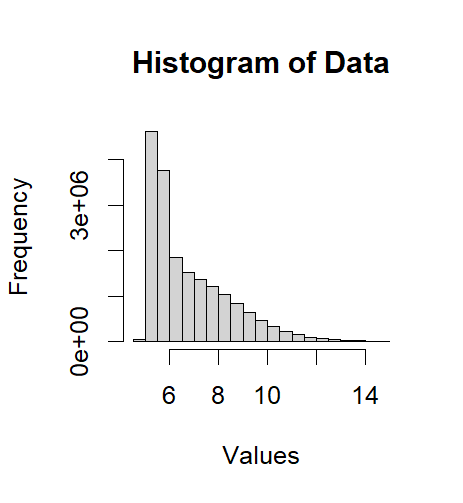


In [ ]:
hist(counts.Disc.genes, breaks = 30, main = "Histogram of Data", xlab = "Values")
q <- qqnorm(counts.Disc.genes)
save(list = ls(), file = "3.rtni_hist_before_permutation.RData")

#5.Building Regulons


In [ ]:
rtni_Disc_all <- tni.permutation(rtni_Disc_all,
                                 nPermutations = 10000,
                                 estimator = "spearman",
                                 verbose = TRUE) rtni_Disc_all <- tni.permutation(rtni_Disc_all,
                                                                                  nPermutations = 10000,
                                                                                  estimator = "spearman",
                                                                                  verbose = TRUE)
